<a href="https://colab.research.google.com/github/Britojuliano99/SIMULATION-OF-WORT-COLLING-/blob/main/Transferencia_de_calor_Ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd

#Funções para calcular os coeficientes de transferencia de calor
#Convecção interna
#Convecção Natural

In [ ]:
def hconvectivo_aquecimento_turbulento(T,m,D,n):
    cp=4180
    k=0.64
    pi=3.14
    u_in=np.zeros((n),dtype=np.float128)
    Re_in=np.zeros((n),dtype=np.float128)
    Pr_in=np.zeros((n),dtype=np.float128)
    Nu_in=np.zeros((n),dtype=np.float128)
    h=np.zeros((n),dtype=np.float128)
    
    u_in[:]=(289+8*(T[:]-300))*10**-6
    Re_in[:]=(4*m)/(u_in[:]*pi*D)
    Pr_in[:]=5.83-0.05*(T[:]-300)
    if Re_in.mean() >10000:
      Nu_in[:]=0.023*(Re_in[:]**(0.8))*(Pr_in[:]**(0.4))
    else:
      Nu_in[:]=0.023*(Re_in[:]**(0.8))*(Pr_in[:]**(0.4))
    h[:]=Nu_in[:]*k/D
    return h
  
def hconvectivo_natural(T,D,Ts):
    g=9.81
    cp=4180
    k=0.64
    rho=1000
    
    Ra_out=np.float128
    u=np.float128
    v=np.float128
    Pr_out=np.float128
    alpha=np.float128
    beta_out=np.float128
    u=(289+8*(T-300))*10**(-6)
    Pr_out=5.83-0.05*(T-300)
    v=u/Pr_out
    alpha= k/(rho*cp)
    beta_out=(276.1+6.77*(T-300))*10**-6
    Ra_out=(g*beta_out*(abs(T-Ts))*D**3)/(v*alpha)
    Nu_out=(0.6+((0.387*(Ra_out)**(1/6))/(1+((0.559/Pr_out)**(9/16)))**(8/27)))**2
    h=Nu_out*k/D
   
    return h


#Usando a media para calcular


In [ ]:
def hconvectivo_aquecimento_turbulento2(Ti,m,D,n):
    cp=4180
    k=0.64
    pi=3.14
    T=Ti.mean()
    
    Re_in=np.float128
    
    u_in=453*10**(-6)
    Re_in=(4*m)/(u_in*pi*D)
    Pr_in=5.83-(0.05*(T-300))
    if Re_in >10000:
      Nu_in=0.023*(Re_in**(0.8))*(Pr_in**(0.4))
      h=Nu_in*k/D
      
    else:
      print(Re_in)
      Nu_in=3.66
      h=Nu_in*k/D
    
    if h==np.NAN:
      print("erro em interno")
    return h
    
  
    
  
def hconvectivo_natural2(T,D,Ts):
    g=9.81
    cp=4180
    k=0.64
    rho=1000
    Ra_out=np.float128
    u=np.float128
    v=np.float128
    Pr_out=np.float128
    alpha=np.float128
    beta_out=np.float128
    u=453*10**(-6)
    Pr_out=5.83-(0.05*(T-300))
    v=u/Pr_out
    alpha= k/(rho*cp)
    beta_out=(276.1+(6.77*(T-300)))*10**-6
    Ra_out=(g*beta_out*(abs(T-Ts))*D**3)/(v*alpha)
    a=(0.387*(Ra_out)**(1/6))
    b=(1+((0.559/Pr_out)**(9/16)))**(8/27)
    Nu_out=(0.6+a/b)**2
    
    h=Nu_out*k/D
    return h

#Função que calcula a tranferencia de calor e retorna 4 valores:
A temperatura do fluido interno para cada instante de tempo;

A temperatura do fluido externo para cada periodo de tempo;

Temperatura que o fluido interno sai;

Tempo total para o resfriamento completo.


In [ ]:
def aquecimentoaguadtdx(T0,Ti,m_dot,r,l,e):
    t_final=100000
    dt=0.1
    n=l*10
    dx=l/n
    x=np.linspace(dx/2,l-dx/2,n)
    T=np.ones(n)*Ti
    T1s=np.ones((t_final,n))
    
    
    T0s=np.ones(t_final)*Ti
    Tsaida=np.ones(t_final)
    dTdt = np.zeros(n)
    m_agua=50
    cp=4180
    k_tubo=237
    rho=1000
    Ts=np.ones(n)*(T+T0)/2
    Tempo=0
    Tempo40=0
    y=np.float128
    ys=np.ones(t_final)
    jbreak=int
    for j in range(0,t_final):
        Ts[:]=(T[:]+T0)/2
        a=hconvectivo_natural(T0,(r+e)*2,Ts)
        b=hconvectivo_aquecimento_turbulento(T,m_dot,r*2,n)
        y=1/(1/b +1/a +((r/k_tubo)*np.log((r+e)/r)))
        ys[j]=y.mean()
        dTdt[0]=((m_dot*cp*(Ti-T[0]))+(y[0]*2*np.pi*dx*r*(T0-T[0])))/(rho*cp*np.pi*dx*r**2)
        dTdt[1:n]=((m_dot*cp*(T[0:n-1]-T[1:n]))+(y[1:n]*2*np.pi*r*dx*(T0-T[1:n])))/(rho*cp*np.pi*dx*r**2)
        a=(Ti-T[n-1])*cp*m_dot*dt
        
        dT0=a/(cp*m_agua)
        T=T+dTdt*dt
        T0=T0+dT0
        Tsaida[j]=T[n-1]-273.15
        T1s[j,:]=T[:]-273.15
        
        T0s[j]=T0-273.15

        
        if T0.round()==(310):
         Tempo40=round(j*dt/60)
        if T0.round()==Ti:
          Tempo=round(j*dt/60)
          print(j)
          jbreak=j
          break
    print(ys.mean())
    print(Tempo40)
    print(Tempo)
    plt.plot(T0s[:jbreak])
    return T1s,T0s,Tsaida,Tempo,Tempo40

In [ ]:
def aquecimentoaguadtdx2(T0,Ti,m_dot,m,r,l,e):
    t_final=100000
    dt=0.1
    n=l*10
    dx=l/n
    x=np.linspace(dx/2,l-dx/2,n)
    Tempos=np.linspace(0,t_final*dt/60,t_final)
    T=np.ones(n)*Ti
    T1s=np.ones((t_final,n))
    
    
    T0s=np.ones(t_final)*(Ti-273.15)
    Tsaida=np.ones(t_final)
    dTdt = np.zeros(n)
    m_agua=m
    cp=4180
    k_tubo=237
    rho=1000
    Ts=np.ones(n)*(T+T0)/2
    Tempo=0
    Tempo40=0
    y=np.float128
    ys=np.ones(t_final)
    jbreak=10000
    for j in range(0,t_final):
        Ts=(T.mean()+T0)/2
       
        b=hconvectivo_aquecimento_turbulento2(T,m_dot,r*2,n)
        a=hconvectivo_natural2(T0,(r+e)*2,Ts)
        y=1/(1/b +1/a +((r/k_tubo)*np.log((r+e)/r)))
        ys[j]=y
        dTdt[0]=((m_dot*cp*(Ti-T[0]))+(y*2*np.pi*dx*r*(T0-T[0])))/(rho*cp*np.pi*dx*r**2)
        dTdt[1:n]=((m_dot*cp*(T[0:n-1]-T[1:n]))+(y*2*np.pi*r*dx*(T0-T[1:n])))/(rho*cp*np.pi*dx*r**2)
        a=(Ti-T[n-1])*cp*m_dot*dt
        
        dT0=a/(cp*m_agua)
        T=T+dTdt*dt
        T0=T0+dT0
        Tsaida[j]=T[n-1]-273.15
        T1s[j,:]=T[:]-273.15
        T0s[j]=T0-273.15
        
        if T0.round()==(310):
         Tempo40=round(j*dt/60)
        if T0.round()==Ti:
          Tempo=round(j*dt/60)
          jbreak=j
          break
    print(ys.mean())
    print(Tempo40)
    print(Tempo)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_xlabel=("Tempo em minutos")
    ax.set_ylabel=("Temperatura do mosto em °C")
    ax.plot(Tempos[:jbreak],T0s[:jbreak],label=("Comprimento do Chiller:", l,"Fluxo de água:",m_dot))
   
    ax.legend()
   
    return T1s,T0s,Tsaida,Tempo,Tempo40

In [ ]:
def plot(Tempos,T0s,jbreak,l,m_dot):
  fig, ax = plt.subplots(figsize=(10,4))
  ax.set_xlabel=("Tempo em minutos")
  ax.set_ylabel=("Temperatura do mosto em °C")
  ax.plot(Tempos[:jbreak],T0s[:jbreak],"Comprimento do Chiller(m):", l,"Fluxo de água(kg/s):",m_dot)
   
  ax.legend()

32.397377072831524
18
65


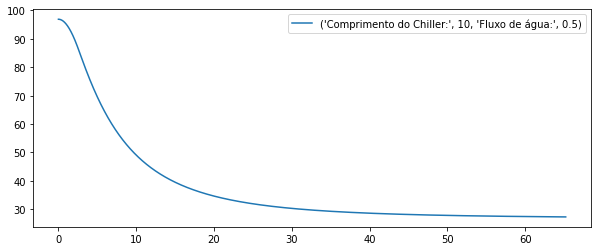

In [ ]:

a1=aquecimentoaguadtdx2(370,300,0.5,50,0.05,10,0.005)

#a3=aquecimentoaguadtdx2(370,300,1,0.025,10,0.005)
#a4=aquecimentoaguadtdx2(370,300,2,0.025,10,0.005)
#a5=aquecimentoaguadtdx2(370,275,0.3,0.025,10,0.005)
#a6=aquecimentoaguadtdx2(370,275,0.3,25,0.025,10,0.005)

##Simulação para cada combinação de parametros.

In [ ]:

a1=aquecimentoaguadtdx(370,300,0.1,0.025,10,0.005)
T0sa1=a1[1]
T1sa1=a1[0]
Tsaidaa1=a1[2]
Tempoa1=a1[3]

b1=aquecimentoaguadtdx(370,300,0.1,0.025,15,0.005)
T0sb1=b1[1]
T1sb1=b1[0]
Tsaidab1=b1[2]
Tempob1=b1[3]


c1=aquecimentoaguadtdx(370,300,0.1,0.025,20,0.005)
T0sc1=c1[1]
T1sc1=c1[0]
Tsaidac1=c1[2]
Tempoc1=c1[3]


d1=aquecimentoaguadtdx(370,300,0.1,0.025,25,0.005)
T0sd1=d1[1]
T1sd1=d1[0]
Tsaidad1=d1[2]

e1=aquecimentoaguadtdx(370,300,0.1,0.025,30,0.005)
T0se1=e1[1]
T1se1=e1[0]
Tsaidae1=e1[2]
Tempod1=d1[3]
f1=aquecimentoaguadtdx(370,300,0.1,0.025,35,0.005)
T0sf1=f1[1]
T1sf1=f1[0]
Tsaidaf1=f1[2]
Tempof1=f1[3]
g1=aquecimentoaguadtdx(370,300,0.1,0.025,40,0.005)
T0sg1=g1[1]
T1sg1=g1[0]
Tsaidag1=g1[2]
Tempog1=g1[3]
h1=aquecimentoaguadtdx(370,300,0.1,0.025,45,0.005)
T0sh1=h1[1]
T1sh1=h1[0]
Tsaidah1=h1[2]
Tempoh1=h1[3]
i1=aquecimentoaguadtdx(370,300,0.1,0.025,50,0.005)
T0si1=i1[1]
T1si1=i1[0]
Tsaidai1=i1[2]
Tempoi1=i1[3]
a2=aquecimentoaguadtdx(370,300,0.2,0.025,20,0.005)
T0sa2=a2[1]
T1sa2=a2[0]
Tsaidaa2=a2[2]
Tempoa2=a2[3]
b2=aquecimentoaguadtdx(370,300,0.3,0.025,20,0.005)
T0sb2=b2[1]
T1sb2=b2[0]
Tsaidab2=b2[2]
Tempob2=b2[3]
c2=aquecimentoaguadtdx(370,300,0.4,0.025,20,0.005)
T0sc2=c2[1]
T1sc2=c2[0]
Tsaidac2=c2[2]
Tempoc2=c2[3]
d2=aquecimentoaguadtdx(370,300,0.5,0.025,20,0.005)
T0sd2=d2[1]
T1sd2=d2[0]
Tsaidad2=d2[2]
Tempod2=d2[3]

 



#Plotagem dos graficos

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Interações")
ax.set_ylabel("Temperatura em °C")
ax.set_title("Temperatura do mosto com diferentes comprimentos do Chiller")
ax.set_ylim((30,100))

plt.plot(T0sa1[:10000],label="a1")
plt.plot(T0sb1[:10000],label="b1")
plt.plot(T0sc1[:10000],label="c1")
plt.plot(T0sd1[:10000],label="d1")
plt.plot(T0se1[:10000],label="e1")
plt.plot(T0sf1[:10000],label="f1")
plt.plot(T0sg1[:10000],label="g1")
plt.plot(T0sh1[:10000],label="h1")
plt.plot(T0si1[:10000],label="i1")

ax.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Interações")
ax.set_ylabel("Temperatura em °C")
ax.set_title("Temperatura do mosto com diferentes fluxos")
ax.set_ylim((30,100))
plt.plot(T0sa2[:10000],label="a2")
plt.plot(T0sb2[:10000],label="b2")
plt.plot(T0sc2[:10000],label="c2")
plt.plot(T0sd2[:10000],label="d2")
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title("Temperatura do mosto para diferentes combinações")
ax.set_ylabel("Temperatura em °C")
ax.set_ylim((30,100))
plt.plot(T0sa1[:10000],label="a1")
plt.plot(T0si1[:10000],label="i1")
plt.plot(T0sd2[:10000],label="d2")
ax.legend()

In [ ]:

Tudo=[a1,a2,b1,b2,c1,c2,d1,d2,e1,f1,g1,h1,i1]
df=pd.DataFrame(Tudo,index=["a1","a2","b1","b2","c1","c2","d1","d2","e1","f1","g1","h1","i1"],columns=["T1s","T0s","Tsaida","Tempo","Tempo50"])


In [ ]:
df.sort_values(by="Tempo",ascending=False,inplace=True)
df["Tempo"]=df["Tempo"].apply(lambda x: x/600)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title("Tempo para o resfriamento Total em minutos")
ax.set_ylabel("Minutos")
df["Tempo"].plot.bar()

In [ ]:
a=df.explode("T1s")
a.explode("T0s")
